In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Usage of bikes depending on the month and hour
```
In this script, we decided to compare the number of collected bikes depending on the month and hour
We expect that the trends can be different in the hot and colder city.
Therefore, we decided to not only analyse the plot but also to compare the results for those two cities.
We chose the Bonn in Germany and Las Palmas de Gran Canaria
```

In [74]:
def get_data(city):
    try:
        conn = psycopg2.connect("dbname='bda-2022-nextbike-data' user='postgres' host='34.118.39.208' password='bda-2022-postgres'")
    except:
        print('I am unable to connect to the database')
        return None
    cursor = conn.cursor()
    cursor.execute("""SELECT EXTRACT(MONTH FROM TIMESTAMP_START) AS MONTH, EXTRACT(HOUR FROM TIMESTAMP_START) AS HOUR, PLACEGUID,  SUM(COLLECTED)
     FROM INTERVALS_USAGE 
     WHERE CITY_NAME = {}
      GROUP BY MONTH,HOUR,PLACEGUID
      """.format(f"'{city}'"))
    rows = cursor.fetchall()
    data = pd.DataFrame(list(rows))
    data.columns = ['month','hour','placeguid', 'collected']
    return data
    

In [80]:
def prepare_plot_for_city(city):
    ''' get data for a chosen city and plot for the most popular station'''
    data = get_data(city)
    the_most_popular = data.groupby('placeguid').agg({'collected':sum}).index[0]
    station = data[data['placeguid']==the_most_popular]
    plt.figure(figsize=(15, 10))
    sns.set_theme(style="darkgrid")
    g = sns.lineplot(data = station,x ='hour',y = 'collected',hue = 'month',palette="tab10")
    g.axes.set_title(label = f"The number of collected bikes in each hour from station in {city} ",
    fontsize = 20)
    plt.show()

## Bonn
```
- The most popular time to collect the bike is in the morning ( around 6/7 am) and the evening (around 16), 
    we assume that the bikes collectors are people who commute to work
- In July and August the collection of the bike is significantly higher than in other months, it is probably because they are the warmest months 
    and hence riding a bike is more pleasant
- The last observation is the fact that in July we can see a small peak around 22 it is probably because people like and can seat longer outside
```

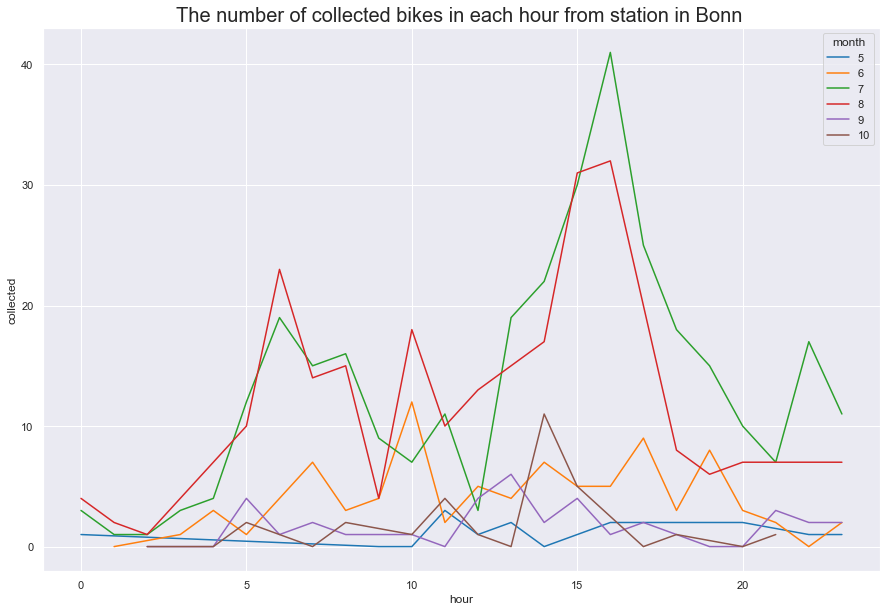

In [81]:
prepare_plot_for_city('Bonn')

# Las Palmas de Gran Canaria
```
- June and September are the most popular months. It is probably because they are warm but not as hot as July or August.
- People tend to collect bikes every month, which is also probably caused by the temperature
- The main peaks are around 7, 10 and 16 - the peak around 10 can indicate that the station is popular with tourists (who do not work)

```

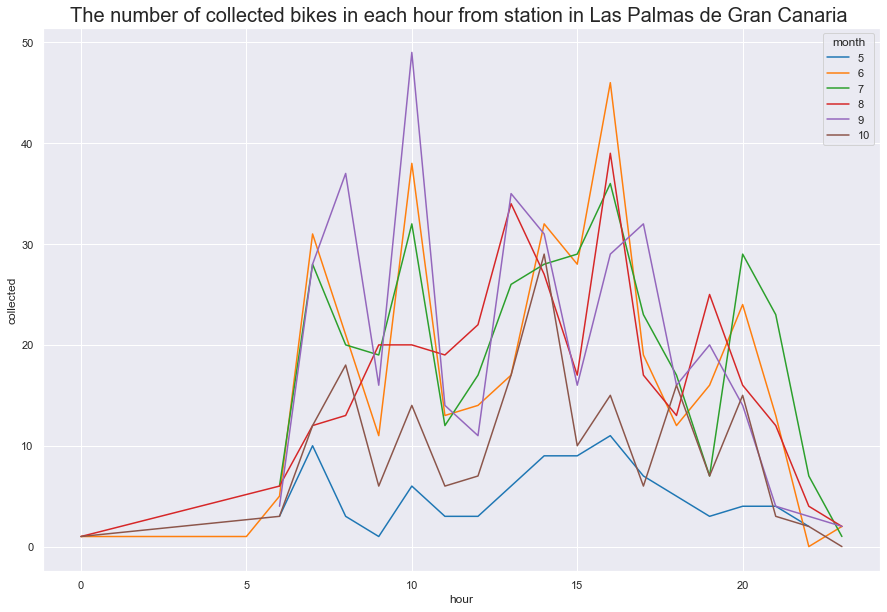

In [82]:
prepare_plot_for_city('Las Palmas de Gran Canaria')

## Comparison between those 2 plots
```
- the first difference is the most popular months. For Bonn, it is July and August and for Las Palmas de Gran Canaria it is June and September.
    It confirms our theory that temperature matters. Moreover, for May and October, bike usage in Bonn is minimal while in Las Palmas de Gran Canaria is still relatively high
- The second comparison can be done for the hours. While the 7 and 16 is a popular hours for both cities, the 10 is only popular for the tourist city of Las Palmas de Gran Canaria.
```